<a href="https://colab.research.google.com/github/shahabas123/Real-Time-Human-Emotion-Detection/blob/main/emotions_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/msambare/fer2013/data")

Skipping, found downloaded files in "./fer2013" (use force=True to force download)


In [3]:
import os
from skimage.io import imread
from skimage.transform import resize
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,BatchNormalization
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

load training data

In [4]:
train_path='/content/fer2013/train'
categories=['angry','disgust','fear','happy','neutral','sad','surprise']
X_train=[]
y_train=[]
for category in categories:
  folder_path=os.path.join(train_path,category)
  images=os.listdir(folder_path)
  for img in images:
    img_path=os.path.join(folder_path,img)
    img_array=imread(img_path)
    img_resize=resize(img_array,(48,48,1))
    X_train.append(img_resize)
    y_train.append(categories.index(category))
  print("Loaded categories:",category)

Loaded categories: angry
Loaded categories: disgust
Loaded categories: fear
Loaded categories: happy
Loaded categories: neutral
Loaded categories: sad
Loaded categories: surprise


load test data

In [5]:
test_path="/content/fer2013/test"
categories=['angry','disgust','fear','happy','neutral','sad','surprise']
X_test=[]
y_test=[]
for category in categories:
  folder_path=os.path.join(test_path,category)
  images=os.listdir(folder_path)
  for img in images:
    img_path=os.path.join(folder_path,img)
    img_array=imread(img_path)
    img_resize=resize(img_array,(48,48,1))
    X_test.append(img_resize)
    y_test.append(categories.index(category))
  print("Loaded category:",category)

Loaded category: angry
Loaded category: disgust
Loaded category: fear
Loaded category: happy
Loaded category: neutral
Loaded category: sad
Loaded category: surprise


In [6]:
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [7]:
X_train.shape,y_train.shape

((28709, 48, 48, 1), (28709,))

In [8]:
X_test.shape,y_test.shape

((7178, 48, 48, 1), (7178,))

In [9]:
unique, counts = np.unique(y_train, return_counts=True)
data_balance = pd.DataFrame({"Emotion": unique, "Count": counts})
print(data_balance)

   Emotion  Count
0        0   3995
1        1    436
2        2   4097
3        3   7215
4        4   4965
5        5   4830
6        6   3171


model building

In [10]:
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))

model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))

model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))

model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7,activation='softmax'))

In [11]:
img_size=48

In [12]:
train_datagen = ImageDataGenerator(width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

In [13]:
train_generator = train_datagen.flow_from_directory(directory = train_path,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = test_path,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [14]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
history=model.fit(x=train_generator,epochs=45,batch_size=64,validation_data=validation_generator)

Epoch 1/45


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


359/359 ━━━━━━━━━━━━━━━━━━━━ 276s 748ms/step - accuracy: 0.2572 - loss: 2.0637 - val_accuracy: 0.2940 - val_loss: 1.9619
Epoch 2/45
359/359 ━━━━━━━━━━━━━━━━━━━━ 267s 742ms/step - accuracy: 0.4082 - loss: 1.5172 - val_accuracy: 0.4413 - val_loss: 1.5110
Epoch 3/45
359/359 ━━━━━━━━━━━━━━━━━━━━ 274s 765ms/step - accuracy: 0.4752 - loss: 1.3824 - val_accuracy: 0.5175 - val_loss: 1.2828
Epoch 4/45
359/359 ━━━━━━━━━━━━━━━━━━━━ 266s 742ms/step - accuracy: 0.5046 - loss: 1.3064 - val_accuracy: 0.5223 - val_loss: 1.2412
Epoch 5/45
359/359 ━━━━━━━━━━━━━━━━━━━━ 266s 740ms/step - accuracy: 0.5360 - loss: 1.2232 - val_accuracy: 0.4211 - val_loss: 1.9599
Epoch 6/45
359/359 ━━━━━━━━━━━━━━━━━━━━ 269s 749ms/step - accuracy: 0.5433 - loss: 1.2113 - val_accuracy: 0.4986 - val_loss: 1.3233
Epoch 7/45
359/359 ━━━━━━━━━━━━━━━━━━━━ 269s 749ms/step - accuracy: 0.5660 - loss: 1.1509 - val_accuracy: 0.5077 - val_loss: 1.3970
Epoch 8/45
359/359 ━━━━━━━━━━━━━━━━━━━━ 267s 743ms/step - accuracy: 0.5680 - loss: 1.14

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 6, 6, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 6, 6, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 3, 3, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 3, 3, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           3,5

 Total params: 5,510,679 (21.02 MB)

 Trainable params: 1,836,231 (7.00 MB)

 Non-trainable params: 1,984 (7.75 KB)

 Optimizer params: 3,672,464 (14.01 MB)

In [18]:
y_pred=model.predict(X_test)
y_pred

225/225 ━━━━━━━━━━━━━━━━━━━━ 17s 76ms/step


array([[9.7556221e-01, 2.3444338e-02, 8.0570427e-04, ..., 7.3648844e-05,
        2.3709370e-05, 8.8001325e-05],
       [2.5615633e-02, 1.5228881e-03, 9.5252115e-03, ..., 7.0885333e-05,
        3.9712479e-05, 9.6322548e-01],
       [7.4223405e-01, 2.4322970e-03, 1.8674326e-01, ..., 1.0383835e-03,
        2.3059804e-02, 6.9469502e-03],
       ...,
       [3.7474766e-02, 4.3178830e-04, 9.4768576e-02, ..., 2.5028851e-02,
        8.4200948e-01, 1.0849874e-04],
       [8.5186976e-04, 1.2888297e-06, 5.2340250e-02, ..., 3.1778589e-05,
        4.4828543e-05, 8.7186307e-01],
       [1.8135898e-08, 3.1352918e-13, 1.6101655e-03, ..., 7.6617501e-10,
        7.5787149e-10, 9.9837446e-01]], dtype=float32)

In [19]:
y_pred1=y_pred.argmax(axis=1)
y_pred1

array([0, 6, 0, ..., 5, 6, 6])

In [20]:
y_test

array([0, 0, 0, ..., 6, 6, 6])

In [21]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.54      0.50      0.52       958
           1       0.62      0.47      0.53       111
           2       0.53      0.38      0.44      1024
           3       0.81      0.85      0.83      1774
           4       0.51      0.64      0.57      1233
           5       0.52      0.42      0.46      1247
           6       0.65      0.84      0.73       831

    accuracy                           0.62      7178
   macro avg       0.60      0.59      0.59      7178
weighted avg       0.61      0.62      0.61      7178



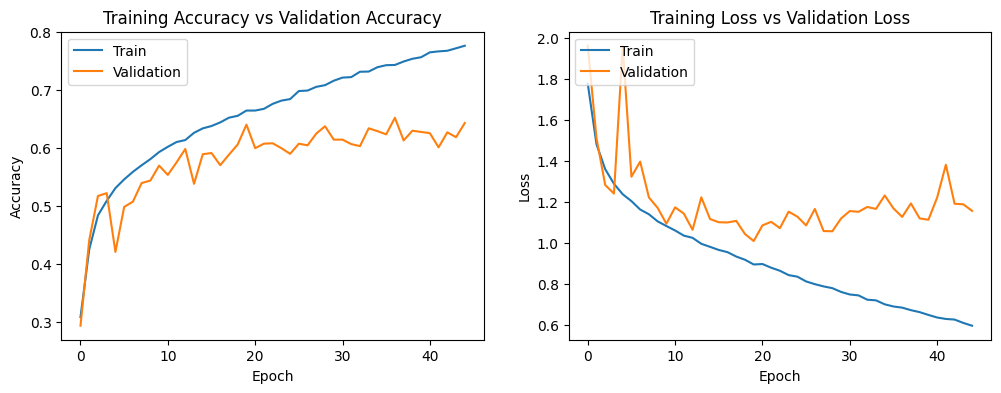

In [22]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [23]:
model.save("emotion_model.h5")